# Proyecto 1 - Explorando los Algoritmos de Aprendizaje Supervisado
## Juan Ignacio Navarro
## Jose David Sánchez
## Steven Badilla

### Implementación de los algoritmos de aprendizaje supervisado
* Regresión Logística

In [ ]:
# Algoritmo de regresión logística

* Árboles de decisión

In [1]:
# Algoritmo de árboles de decision

* KNN

In [2]:
# Algoritmo de KNN

### Prueba de los algoritmos con set de datos

* Set de datos de Red Wine Quality

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


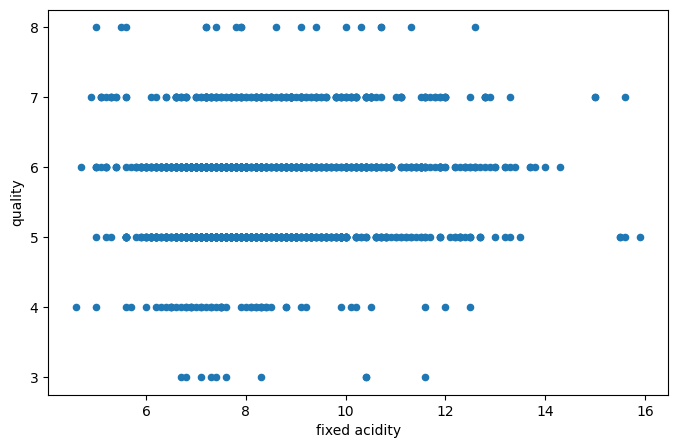

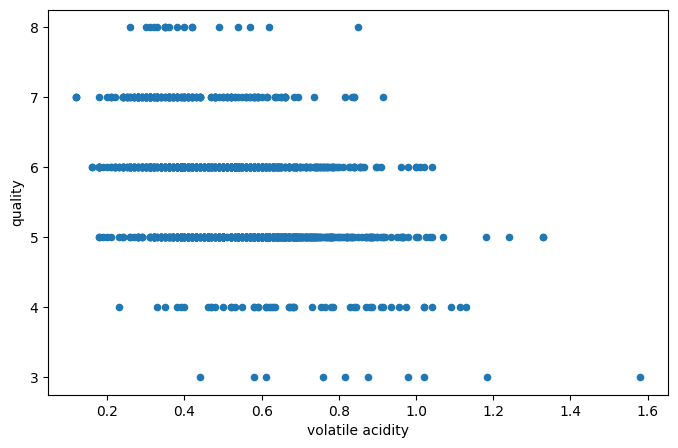

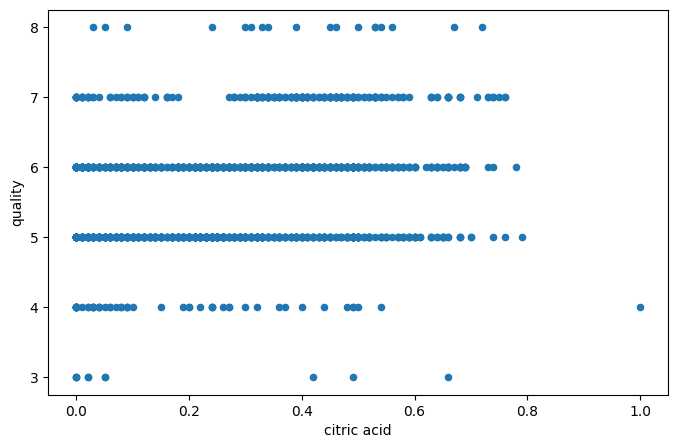

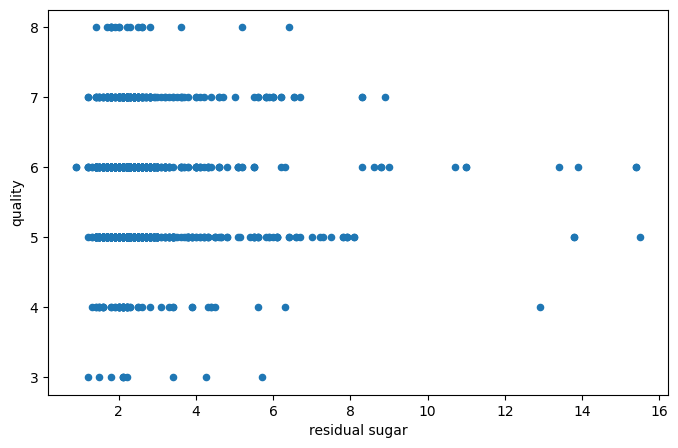

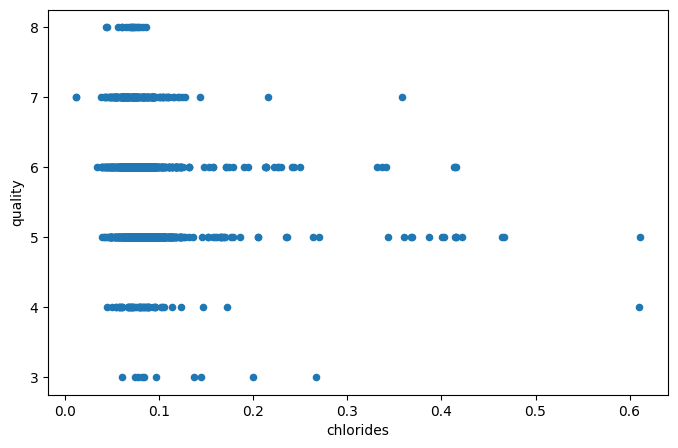

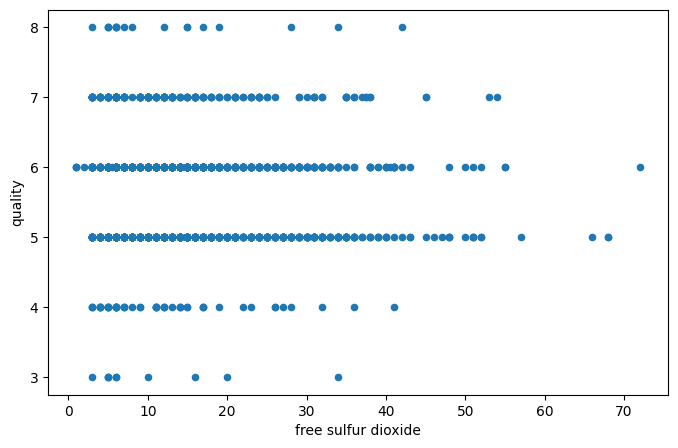

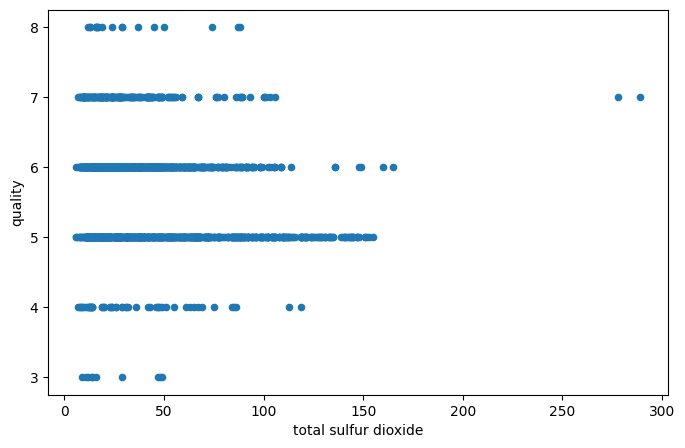

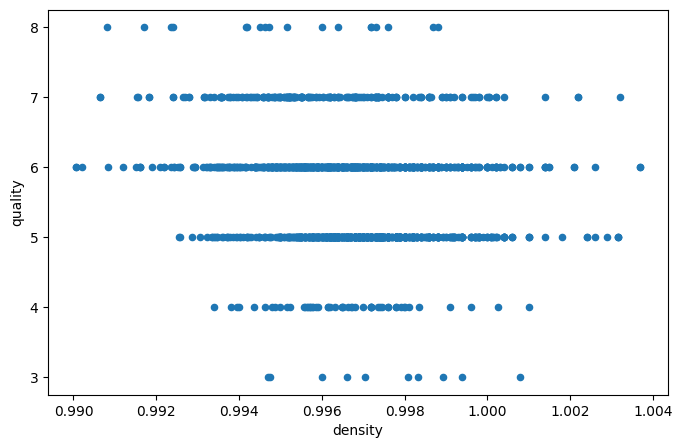

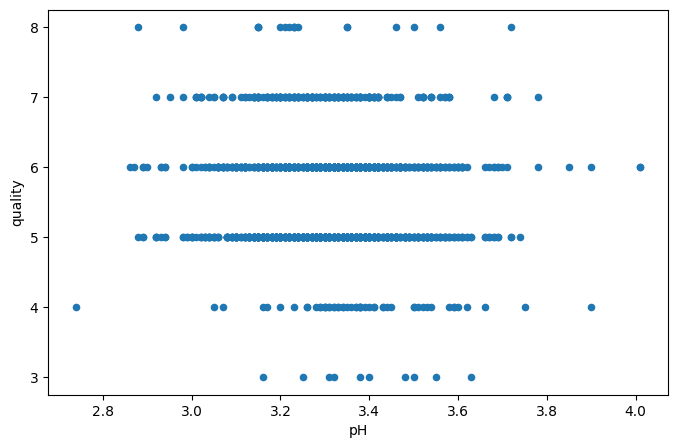

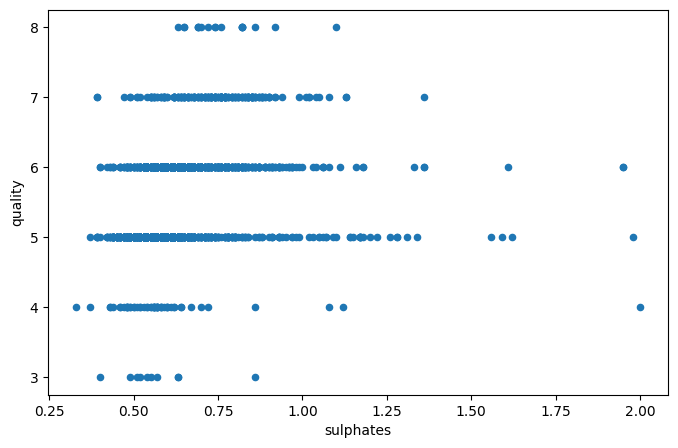

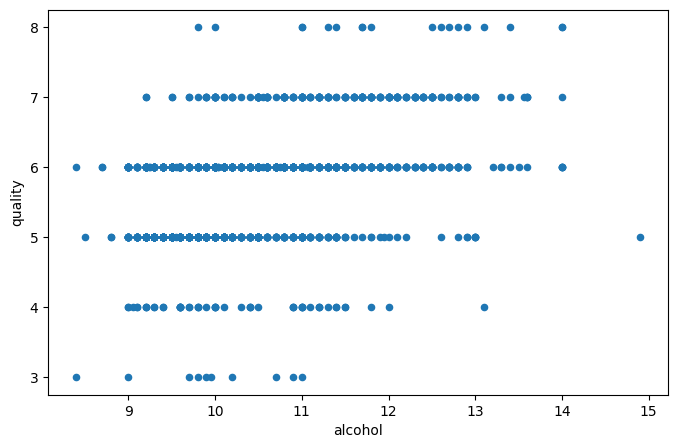

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data set
df_wine = pd.read_csv('datasets/winequality-red.csv')

# make sure that there are no null values that can affect the models
mask = df_wine.isnull()
print(mask.sum())

# visualizing the values of each feature and the comparison to the output
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()

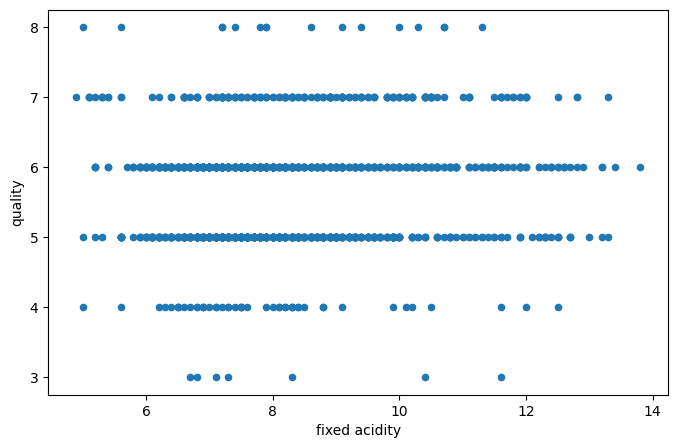

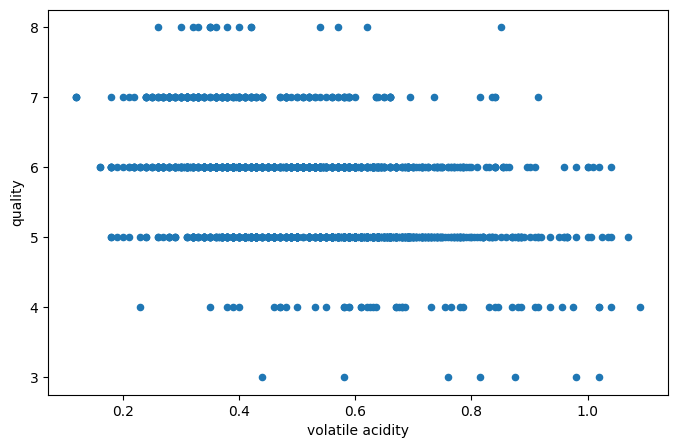

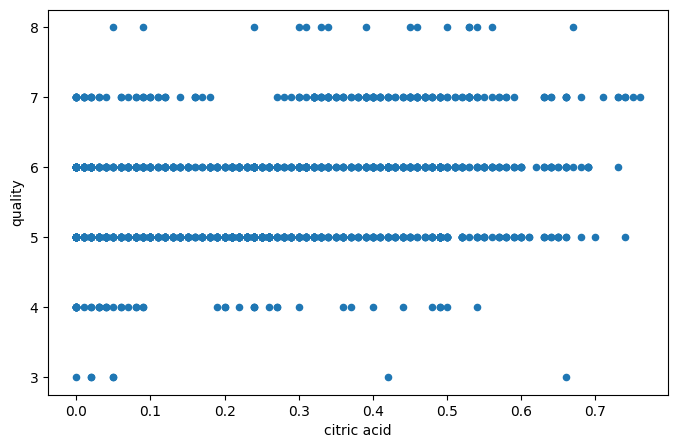

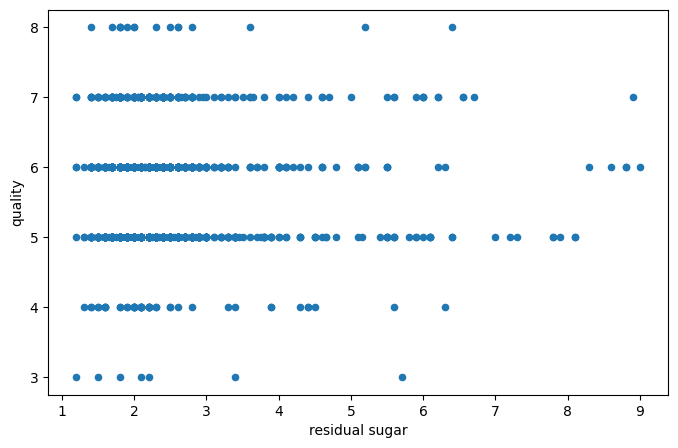

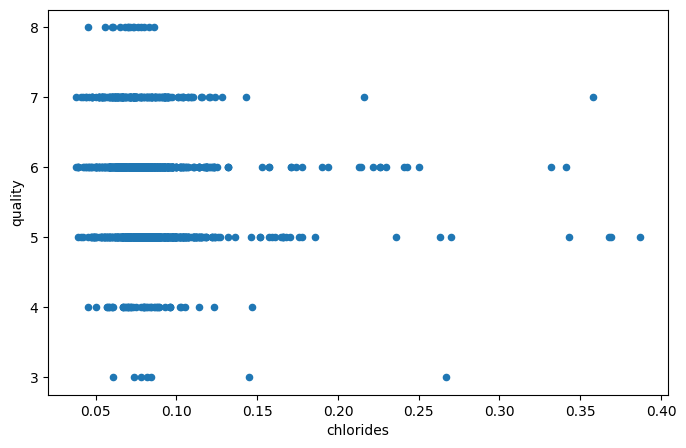

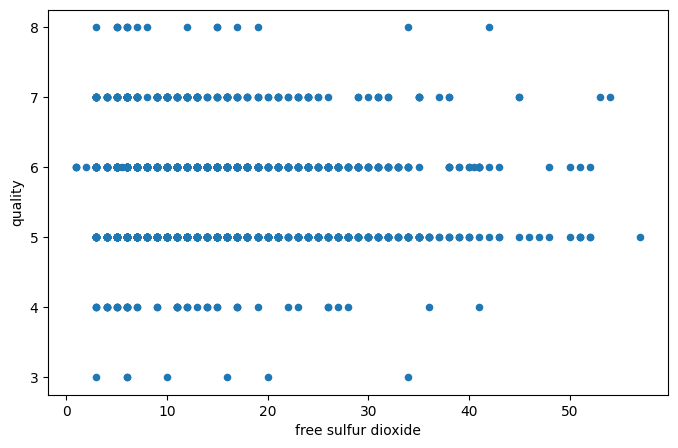

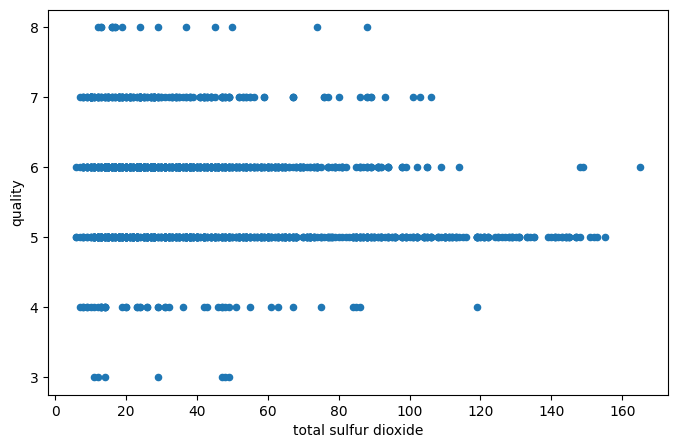

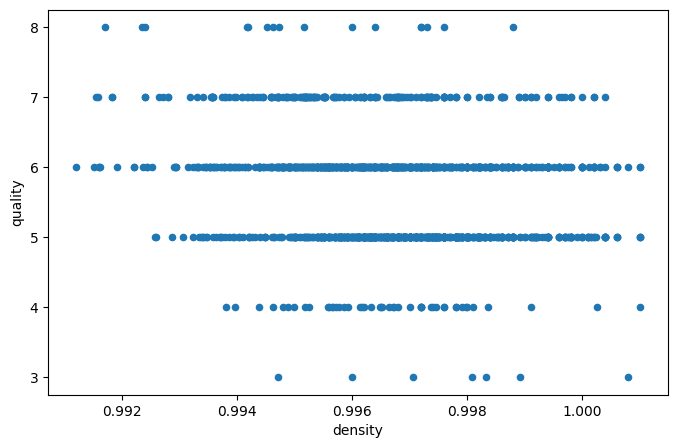

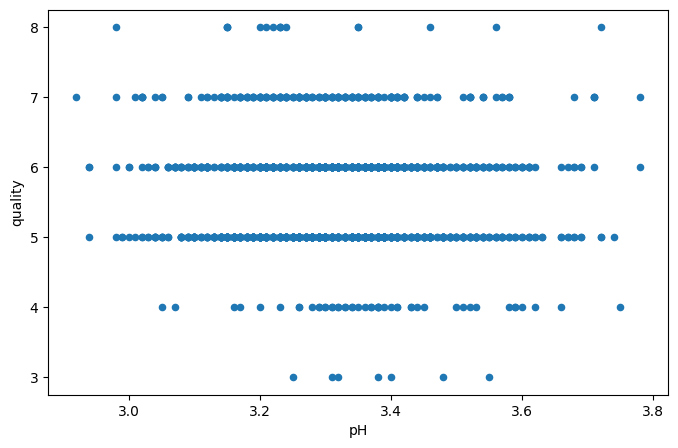

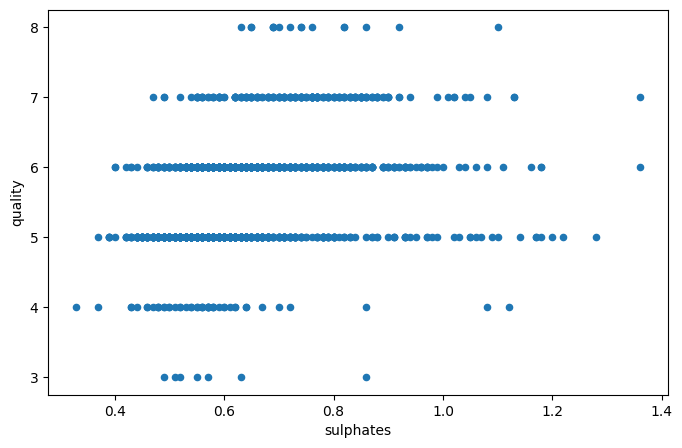

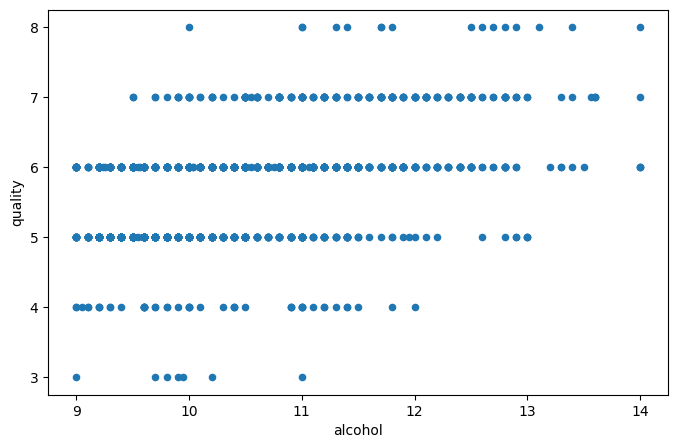

In [40]:
# delete data instances with values that are far from the normal distribution
df_wine = df_wine.loc[(df_wine['fixed acidity'] >= 4) & (df_wine['fixed acidity'] <= 14)]
df_wine = df_wine.loc[(df_wine['volatile acidity'] >= 0.1) & (df_wine['volatile acidity'] <= 1.1)]
df_wine = df_wine.loc[(df_wine['citric acid'] >= 0) & (df_wine['citric acid'] <= 0.8)]
df_wine = df_wine.loc[(df_wine['residual sugar'] >= 0) & (df_wine['residual sugar'] <= 10)]
df_wine = df_wine.loc[(df_wine['chlorides'] >= 0) & (df_wine['chlorides'] <= 0.4)]
df_wine = df_wine.loc[(df_wine['free sulfur dioxide'] >= 0) & (df_wine['free sulfur dioxide'] <= 60)]
df_wine = df_wine.loc[(df_wine['total sulfur dioxide'] >= 0) & (df_wine['total sulfur dioxide'] <= 200)]
df_wine = df_wine.loc[(df_wine['density'] >= 0.991) & (df_wine['density'] <= 1.001)]
df_wine = df_wine.loc[(df_wine['pH'] >= 2.9) & (df_wine['pH'] <= 3.8)]
df_wine = df_wine.loc[(df_wine['sulphates'] >= 0.25) & (df_wine['sulphates'] <= 1.50)]
df_wine = df_wine.loc[(df_wine['alcohol'] >= 9) & (df_wine['alcohol'] <= 14)]

# visualizing the values of each feature and the comparison to the output
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()

In [41]:
# Normalize the data to the same distribution of values
df_wine['alcohol'] = (df_wine['alcohol']-df_wine['alcohol'].mean())/df_wine['alcohol'].std()
df_wine['chlorides'] = (df_wine['chlorides']-df_wine['chlorides'].mean())/df_wine['chlorides'].std()
df_wine['citric acid'] = (df_wine['citric acid']-df_wine['citric acid'].mean())/df_wine['citric acid'].std()
df_wine['density'] = (df_wine['density']-df_wine['density'].mean())/df_wine['density'].std()
df_wine['fixed acidity'] = (df_wine['fixed acidity']-df_wine['fixed acidity'].mean())/df_wine['fixed acidity'].std()
df_wine['free sulfur dioxide'] = (df_wine['free sulfur dioxide']-df_wine['free sulfur dioxide'].mean())/df_wine['free sulfur dioxide'].std()
df_wine['pH'] = (df_wine['pH']-df_wine['pH'].mean())/df_wine['pH'].std()
df_wine['residual sugar'] = (df_wine['residual sugar']-df_wine['residual sugar'].mean())/df_wine['residual sugar'].std()
df_wine['sulphates'] = (df_wine['sulphates']-df_wine['sulphates'].mean())/df_wine['sulphates'].std()
df_wine['total sulfur dioxide'] = (df_wine['total sulfur dioxide']-df_wine['total sulfur dioxide'].mean())/df_wine['total sulfur dioxide'].std()
df_wine['volatile acidity'] = (df_wine['volatile acidity']-df_wine['volatile acidity'].mean())/df_wine['volatile acidity'].std()

df_wine['quality'] = (df_wine['quality']-df_wine['quality'].mean())/df_wine['quality'].std()

df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.530751,1.015917,-1.391274,-0.529735,-0.250099,-0.462381,-0.358749,0.651012,1.357855,-0.625868,-0.990495,-0.804536
1,-0.284481,2.064723,-1.391274,0.162568,0.463435,0.941598,0.699004,0.067046,-0.831621,0.227742,-0.603842,-0.804536
2,-0.284481,1.365519,-1.180395,-0.134133,0.268835,-0.061244,0.282313,0.183839,-0.407851,0.014340,-0.603842,-0.804536
3,1.808819,-1.431296,1.561037,-0.529735,-0.282532,0.139324,0.474632,0.767805,-1.114134,-0.483600,-0.603842,0.450374
4,-0.530751,1.015917,-1.391274,-0.529735,-0.250099,-0.462381,-0.358749,0.651012,1.357855,-0.625868,-0.990495,-0.804536
5,-0.530751,0.782849,-1.391274,-0.628636,-0.282532,-0.261813,-0.166430,0.651012,1.357855,-0.625868,-0.990495,-0.804536
6,-0.222913,0.433248,-1.074955,-0.826437,-0.477133,-0.061244,0.442579,-0.166540,-0.125338,-1.337211,-0.990495,-0.804536
7,-0.592319,0.724582,-1.391274,-1.222039,-0.606866,-0.061244,-0.775440,-1.217679,0.510316,-1.266077,-0.410515,1.705284
8,-0.284481,0.316714,-1.285834,-0.430835,-0.347399,-0.662950,-0.871599,0.067046,0.298431,-0.554734,-0.893832,1.705284
9,-0.469184,-0.149422,0.506640,3.624086,-0.412266,0.139324,1.820863,0.651012,0.227803,1.081353,0.072801,-0.804536


* Set de datos de notas del curso de Arquitectura de Computadores I

In [ ]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

* Set de datos a elegir

In [ ]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

### Puntos extra: modelo que precide la nota del estudiante (utilizando el set de datos de Arquitectura de Computadores I)

La predicción está basada en las notas del proyecto 1, proyecto 2, examen 1 y taller 1.